# Developing Work Streams for Lacuna data analysis.

### key areas of analysis that understood so far:

#### 1. EDA on Survey wave 1 data.
#### 2. Load Profiling: 
        Electricity consumption across different times of the day, days of the week, and seasons (to identify peak demand periods) 
#### 3. Consumer Segmentation: 
        Use clustering to segment consumers based on their consumption patterns and demographics. (Understand behaviors of specific consumer groups).
#### 4. Behavioral Analysis: 
        How household characteristics (e.g., size, income, occupancy patterns) and attitudes towards energy conservation influence electricity consumption.
#### 5. Various other
        Asses how consumption changes in households in electricity price changes and Tariff structures. 
        Appliance Usage Analysis: Look in to impact of various appliances on overall consumption.

#### 6. Look into literature
        Refer to the work done on UK-DALE, IDEAL, DEDDIAG
#### .
#### .
#### n. Predictive Modeling: 

## EDA on Survey wave 1 data.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


survey_data = pd.read_csv('/lirneasia/data/lacuna/raw/Survey_data/Survey_wave_1_may_29.csv', low_memory=False)

'''
Tasks 
- Finding anomalies / outliers 
- Lookinto each field and corresponding survey question responses

'''

'\nTasks \n- Finding anomalies / outliers \n- Lookinto each field and corresponding survey question responses\n\n'

#### House built year

Time periods that best describes when your house was built? Knowing when the house was built will help us to understand whether there’s any difference in older homes and newly built homes with regard to electricity consumption. for example, compared to a household built before 1980, a household built recently may use different techniques, improved material etc., which will help reduce energy consumption. 

Before 1980 - 1

1980-1989 - 2

1990-1999 - 3

2000-2009 - 4

2010-2019 - 5

In 2020 or After 2020 - 6

Don’t know - 7

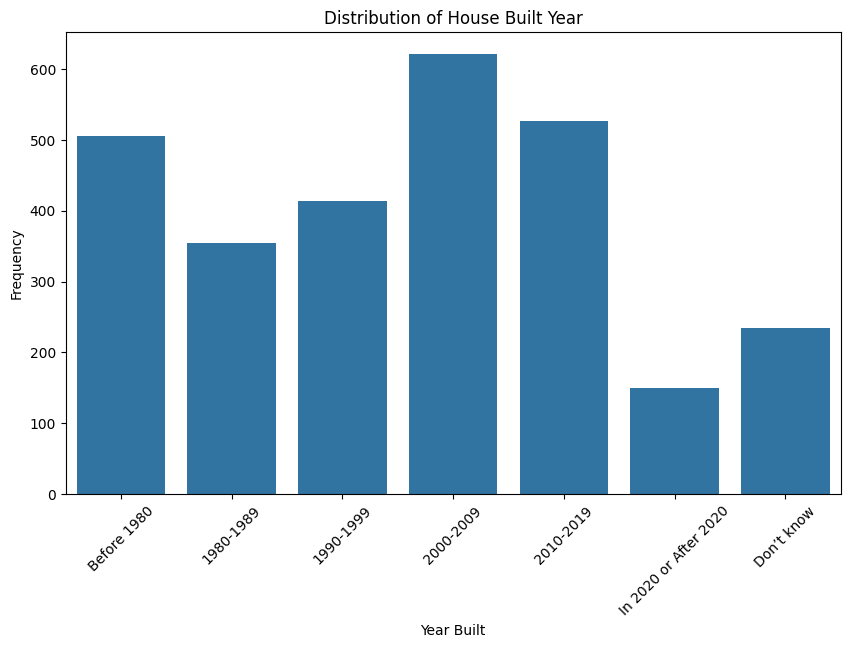

In [2]:
year_breakdown = {
    1: 'Before 1980',
    2: '1980-1989',
    3: '1990-1999',
    4: '2000-2009',
    5: '2010-2019',
    6: 'In 2020 or After 2020',
    7: 'Don’t know'
}
mapped_labels = ['Before 1980', '1980-1989', '1990-1999', '2000-2009', '2010-2019', 'In 2020 or After 2020', 'Don’t know']#survey_data['W1_B_2'].map(year_breakdown).unique()

plt.figure(figsize=(10, 6))
sns.countplot(x=survey_data['W1_B_2'].map(year_breakdown), order=mapped_labels)
plt.title('Distribution of House Built Year')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
#plt.figure(figsize=(10, 6))
#sns.histplot(df['house_built_year'], bins=20, kde=True)



### Type of the house

1.	Single House - Single Floor
2.	Single House -Double Floor
3.	Single House – More than 2 floors
4.	Attached house / Annex
5.	Flat
6.	Condominium/ Luxury apartments
7.	Twin houses
8.	Line room/row house
9.	Slum / Shanty
10.	Other

In [3]:
type_of_the_house = {
1: 'Single House - Single Floor',
2: 'Single House -Double Floor',
3: 'Single House – More than 2 floors',
4: 'Attached house / Annex',
5: 'Flat',
6: 'Condominium/ Luxury apartments',
7: 'Twin houses',
8: 'Line room/row house',
9: 'Slum / Shanty',
10: 'Other'

}

order_type = ['Single House - Single Floor', 'Single House -Double Floor', 'Single House – More than 2 floors', 'Attached house Annex', 'Flat', 'Condominium/ Luxury apartments', 'Twin houses', 'Line room/row house', 'Slum / Shanty', 'Other']
x=survey_data['W1_B_5'].map(type_of_the_house).value_counts()
print(x)



W1_B_5
Single House - Single Floor          1732
Single House -Double Floor            909
Single House – More than 2 floors      73
Flat                                   49
Line room/row house                    11
Slum / Shanty                          11
Twin houses                             9
Attached house / Annex                  8
Condominium/ Luxury apartments          2
Other                                   2
Name: count, dtype: int64


#### what floor located in if Flat or an apartment

In [4]:
floor_number = survey_data['W1_B_6'].value_counts()
floor_number = floor_number[floor_number.index != -1]
floor_number


W1_B_6
1     19
2      9
0      8
3      5
4      3
10     2
6      2
9      1
5      1
7      1
Name: count, dtype: int64

In [49]:
survey_data[survey_data['W1_B_6'] == 10]

,SERIALNO,UniqueID,ACCOUNT_NO,T_PData_1,T_PData_2,T_PData_3,T_PData_4,T_PData_5,T_PData_6,T_PData_7,...,Trimmer_availability,Tile_Cutter_Machine_availability,Sawing_Machine_availability,Wood_Chipping_Machine_availability,Concrete_Mixture_Machine_availability,Hair_Cutting_Machine_availability,Generator_Battery_availability,Bouth_availability,Grill_availability,LA_Unique_ID
4,194744078,KOL00924,107193504,S S ATHIKA,1/B/F/10/U/21 LAKSANDA SEVANA SALAMULLA KOLONN...,,,94763088064,non_smart_meter,KOTTE,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10107193504
14,194748432,KOL00925,107196507,G C K FERNANDO,1/B/F/10/U/16 LAKSANDA SEVANA SALAMULLA KOLONN...,,,94774415637,non_smart_meter,KOTTE,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10107196507


In [11]:
#No of storeys the house has - has null / 0 / 1

survey_data['W1_B_7'].value_counts()

W1_B_7
     2641
3      66
1      52
0      24
2      23
Name: count, dtype: int64

#### Floor area of this household 

i.e. how many square feet does this household's electricity meter cover
Stated the area of the house in square feet.

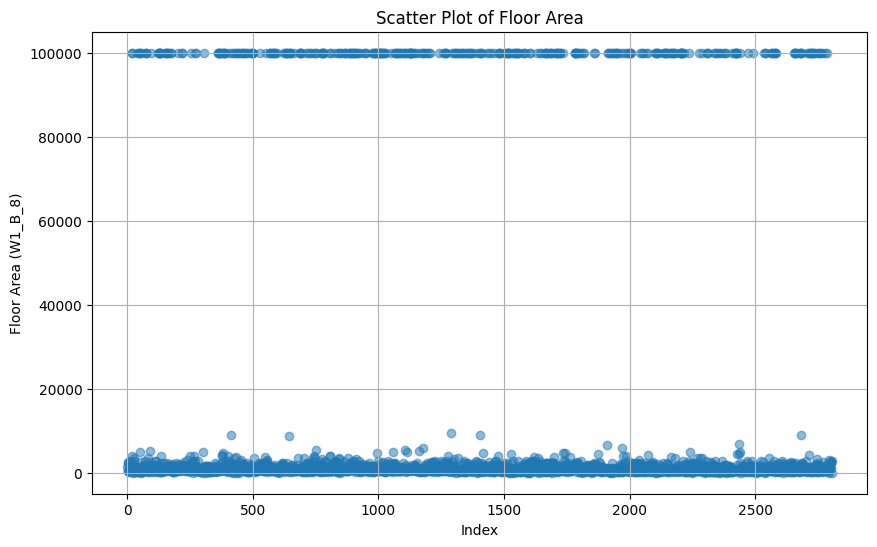

In [60]:
survey_data['W1_B_8'] = pd.to_numeric(survey_data['W1_B_8'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(range(len(survey_data)), survey_data['W1_B_8'], alpha=0.5)
plt.title('Scatter Plot of Floor Area')
plt.xlabel('Index')
plt.ylabel('Floor Area in square feet')
plt.grid(True)
plt.show()


In [68]:
floor_area= survey_data[survey_data['W1_B_8'] > 80000]
floor_area = floor_area['W1_B_8']

floor_area_filtered = survey_data[survey_data['W1_B_8'] < 10000]
floor_area_filtered = floor_area_filtered['W1_B_8']

floor_area

# For 379 households floor area is 99999.0

19      99999.0
20      99999.0
39      99999.0
47      99999.0
48      99999.0
         ...   
2754    99999.0
2760    99999.0
2765    99999.0
2778    99999.0
2784    99999.0
Name: W1_B_8, Length: 379, dtype: float64

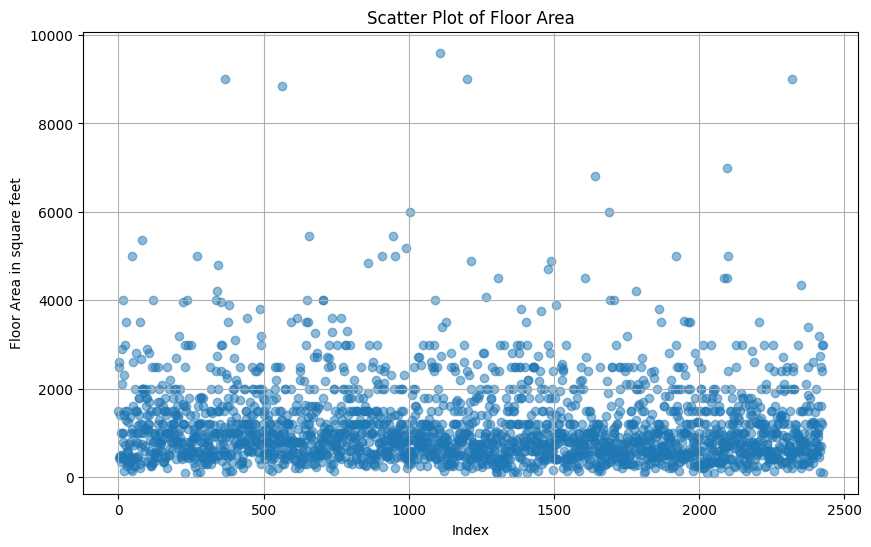

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(floor_area_filtered)), floor_area_filtered, alpha=0.5)
plt.title('Scatter Plot of Floor Area')
plt.xlabel('Index')
plt.ylabel('Floor Area in square feet')
plt.grid(True)

# Show the plot
plt.show()

### Number of household members living in the household

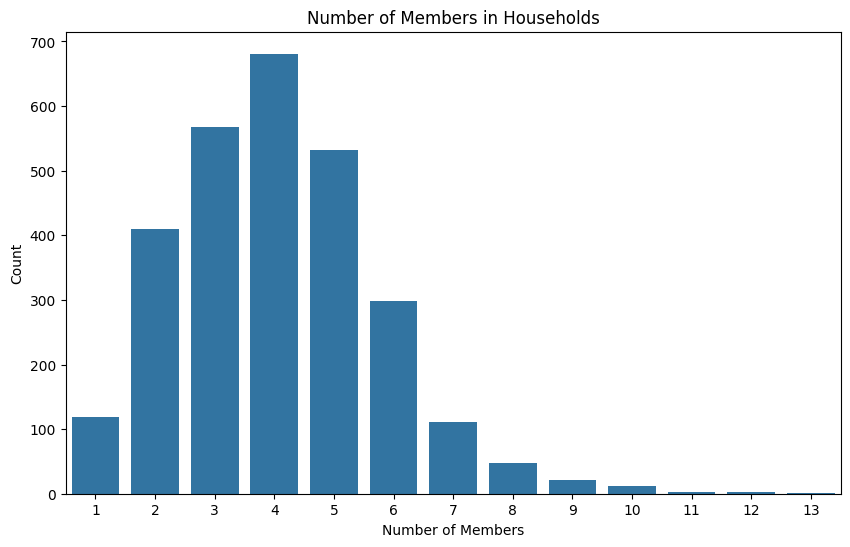

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(data=survey_data, x='W1_C_1')
plt.title('Number of Members in Households')
plt.xlabel('Number of Members')
plt.ylabel('Count')
plt.show()


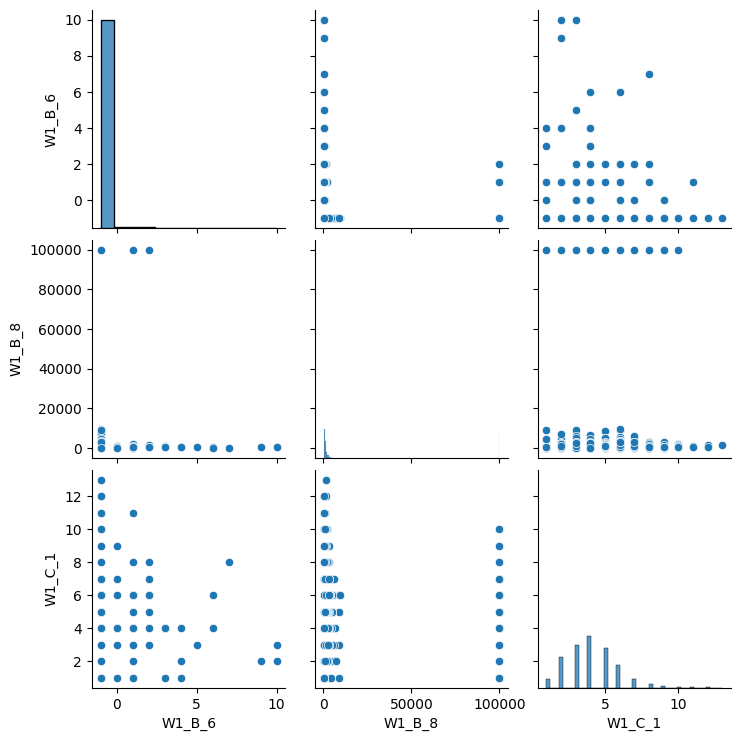

In [75]:
sns.pairplot(survey_data[['W1_B_6', 'W1_B_8', 'W1_C_1']])
plt.show()


#### Main material used to build the outside walls of the house

1. Brick
2. Cement block,
3. Stones/Cube stones, 
4. Cabook, 
5. Pressed soil blocks, 
6. Cadjan / palmyra, 
7. Wood / Takaran/ Asbastos, 
8. Metal sheet,
9. Mud, 
10. Other, 
11. I am not aware of that

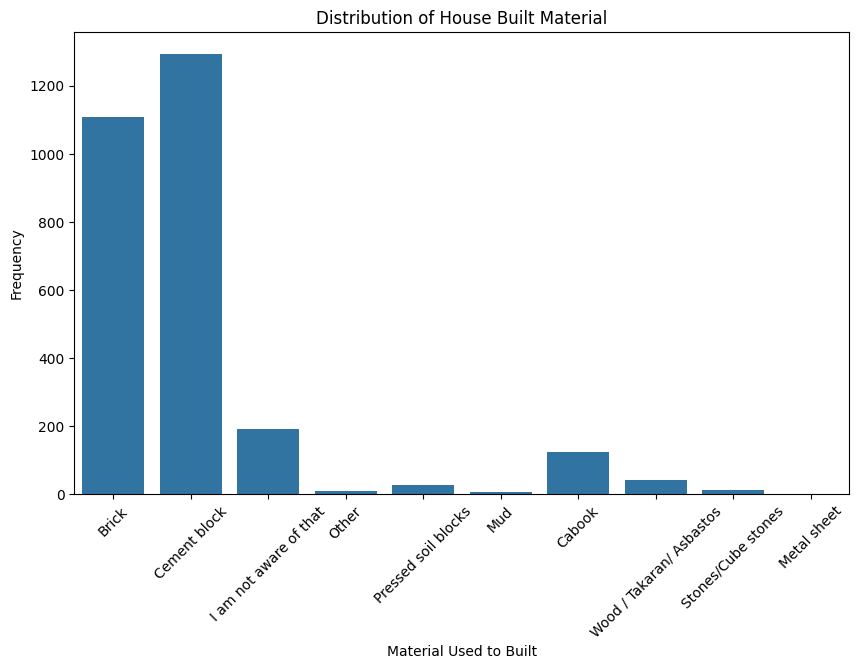

In [5]:
material = {
1: 'Brick', 
2: 'Cement block',
3: 'Stones/Cube stones', 
4: 'Cabook', 
5: 'Pressed soil blocks', 
6: 'Cadjan / palmyra', 
7: 'Wood / Takaran/ Asbastos', 
8: 'Metal sheet',
9: 'Mud', 
10: 'Other', 
11: 'I am not aware of that'
}

plt.figure(figsize=(10, 6))
sns.countplot(x=survey_data['W1_E_2'].map(material))
plt.title('Distribution of House Built Material')
plt.xlabel('Material Used to Built')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



#### On average the number of different types of rooms in a household

Living room, 

Bed rooms, 

Kitchen and/or pantry / dining room, 

Bathroom and / or toilets, 

Storage room, Other rooms / parts in the house including passages, 

veranda’s, 

balconies, 

staircase etc,

Garage,

Security Room,

Garden (including the wall around the garden, if any)',

Other rooms outside the house


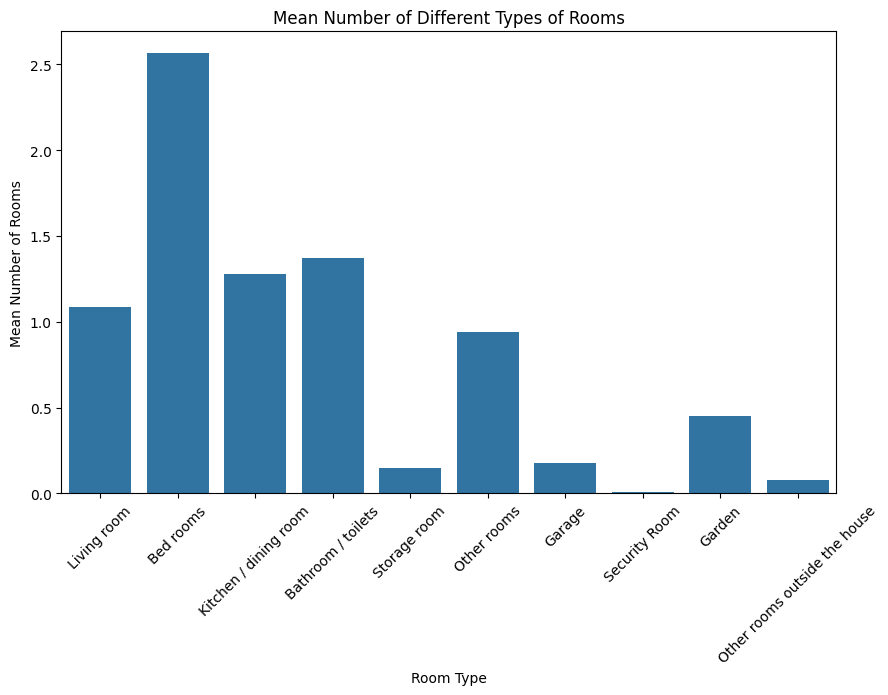

In [81]:
mean_values = survey_data[['T_W1_E_5_1', 'T_W1_E_5_2', 'T_W1_E_5_3', 'T_W1_E_5_4', 'T_W1_E_5_5', 'T_W1_E_5_6', 'T_W1_E_5_7', 'T_W1_E_5_8', 'T_W1_E_5_9', 'T_W1_E_5_10']].mean()
indexes = ['Living room', 'Bed rooms', 'Kitchen / dining room', 'Bathroom / toilets', 'Storage room', 'Other rooms', 'Garage', 'Security Room', 'Garden', 'Other rooms outside the house']


plt.figure(figsize=(10, 6))
sns.barplot(x=indexes, y=mean_values.values)
plt.title('Mean Number of Different Types of Rooms')
plt.xlabel('Room Type')
plt.ylabel('Mean Number of Rooms')
plt.xticks(rotation=45)
plt.show()

#### Number of households currently having constructuons or renovations

In [6]:
survey_data['W1_E_8'].value_counts()

W1_E_8
0    2648
1     158
Name: count, dtype: int64

#### Number of households having a backup generator to generate electricity

In [84]:
'''Does your household have a backup generator to generate electricity if needed? 1.Yes 0.No '''
survey_data['W1_E_10'].value_counts()

#Responses should be in 0 and 1

W1_E_10
2    2722
1      84
Name: count, dtype: int64

### Methods of electricity generation

Apart from the electricity that get from the national grid and the back-up generator, 

Solar Energy,

Bioenergy,

Mini Hydropower,

Wind Power,

Other

In [9]:
columns_to_check = ['T_W1_E_11_1', 'T_W1_E_11_2', 'T_W1_E_11_3', 'T_W1_E_11_4', 'T_W1_E_11_5']

Solar_energy = len(survey_data[survey_data['T_W1_E_11_1'] == 1])
Bio_energy = len(survey_data[survey_data['T_W1_E_11_2'] == 1])
Mini_hydropower = len(survey_data[survey_data['T_W1_E_11_3'] == 1])
Wind_power = len(survey_data[survey_data['T_W1_E_11_4'] == 1])
Other = len(survey_data[survey_data['T_W1_E_11_5'] == 1])

print(f'No of households using different methods for generating electricity: out of {len(survey_data)} households')
print('\n')
print(f'Solar Energy: {Solar_energy}')
print(f'Bio Energy: {Bio_energy}')
print(f'Mini Hydropower: {Mini_hydropower}')
print(f'Wind_power: {Wind_power}')
print(f'Other methods: {Other}')


finding_anomolies = survey_data[survey_data[columns_to_check].eq(1).all(axis=1)]
#electricity_generation = filtered_data[columns_to_check].value_counts()
#filtered_data['T_W1_E_11_1'].value_counts()

No of households using different methods for generating electricity: out of 2806 households


Solar Energy: 255
Bio Energy: 22
Mini Hydropower: 9
Wind_power: 8
Other methods: 12


In [117]:
finding_anomolies

,SERIALNO,UniqueID,ACCOUNT_NO,T_PData_1,T_PData_2,T_PData_3,T_PData_4,T_PData_5,T_PData_6,T_PData_7,...,Trimmer_availability,Tile_Cutter_Machine_availability,Sawing_Machine_availability,Wood_Chipping_Machine_availability,Concrete_Mixture_Machine_availability,Hair_Cutting_Machine_availability,Generator_Battery_availability,Bouth_availability,Grill_availability,LA_Unique_ID
552,195768612,MAH007363,703417803,KANNANGARA K K R,"18/7/1/1, NALANDARAMA NAWINNA MAHARAGAMA",,2745781,0,smart_meter,NUGEGODA,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10703417803
1966,196455046,KOL00975,107604211,MOOSEEN M F H,237/Q 3RD LN WENNAWATTA WELLAMPITIYA,112692281,772292281,94772292281,smart_meter,KOTTE,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10107604211


In [118]:
'''W1_E_13: Is your solar system on-grid or off-grid? 1. On-grid 2.	Off-grid'''

survey_data['W1_E_13'].value_counts()

W1_E_13
     2551
1     202
2      53
Name: count, dtype: int64

In [119]:
'''W1_E_14: Do you have an inverter for the solar energy generation system? (DC) to (AC)
 1. Yes 
 0. No '''

survey_data['W1_E_14'].value_counts()

W1_E_14
     2551
1     191
0      64
Name: count, dtype: int64

#### Which of the following purposes solar energy is used in the household

1. Water heating
2. Cooking
3. Outdoor lighting
4. Car charging
5. Agriculture equipment and systems
6. All of the above
7. Other

([<matplotlib.patches.Wedge at 0x7f29f0d6d510>,
 [Text(-0.8737189045423424, 0.6682928069681203, 'Water heating'),
  Text(0.6188521008244623, -0.9094075419222944, 'Cooking'),
  Text(0.9935719649054597, -0.4720325736153217, 'Car charging'),
  Text(1.0836784775354626, -0.18878812813951493, 'Other'),
  Text(1.097913669190141, -0.06771687386052236, 'All of the above'),
  Text(1.0999165226627767, -0.013551500781305239, 'Outdoor lighting')],
 [Text(-0.47657394793218666, 0.36452334925533836, '79.2%'),
  Text(0.33755569135879754, -0.49604047741216056, '10.6%'),
  Text(0.5419483444938871, -0.2574723128810845, '6.3%'),
  Text(0.5910973513829796, -0.1029753426215536, '2.4%'),
  Text(0.5988620013764405, -0.036936476651194004, '1.2%'),
  Text(0.5999544669069691, -0.007391727698893765, '0.4%')])

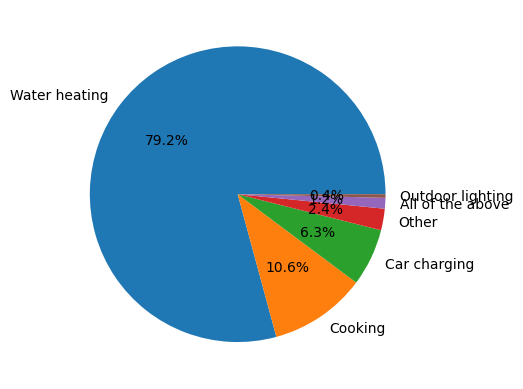

In [14]:
sola = survey_data[survey_data['T_W1_E_11_1'] == 1]
x = sola['W1_E_15_O1'].value_counts()
labels = ['Water heating', 'Cooking', 'Car charging', 'Other', 'All of the above', 'Outdoor lighting']
fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%')


In [34]:
''' 
W1_E_15a: Are you aware of the number of units generated by the solar energy system in the last one month? 1. Yes 0. No
W1_E_15b: How many units did the solar system generate last month? No. of units
'W1_E_16': 'When did you start using solar for electricity generation? Was it before November 2022 or after November 2022? 
1.	Before November 2022 
2.	After November 2022 '''

y = survey_data['W1_E_15a'].value_counts()
x = survey_data['W1_E_16'].value_counts()
print(f'Number of people aware of the units generated by solar energy: {y[2]} ')
print('\n')

print(f'{x[1]} number of people started using solar electricity generation Before November 2022')
print(f'{x[2]} number of people started using solar electricity generation After November 2022')

print('\n')
#sola = survey_data[survey_data['W1_E_15a'] == 0]
#survey_data['W1_E_15b'].value_counts()

Number of people aware of the units generated by solar energy: 121 


212 number of people started using solar electricity generation Before November 2022
43 number of people started using solar electricity generation After November 2022




/tmp/ipykernel_52340/4056241864.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Number of people aware of the units generated by solar energy: {y[2]} ')
/tmp/ipykernel_52340/4056241864.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{x[1]} number of people started using solar electricity generation Before November 2022')
/tmp/ipykernel_52340/4056241864.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pr

#### What source of energy is used to boil water for drinking? 

1.	Gas 
2.	Electricity (directly from the national grid) 
3.	Electricity (generated from solar energy system) 
4.	Firewood 
5.	Kerosene 
6.	Saw dust/ Paddy husk. 
7.	Biogas 
8.	Coconut shells/charcoal 
9.	Other

([<matplotlib.patches.Wedge at 0x7f3dd859d5d0>,
 [Text(-0.19478512432716963, 1.0826166243600959, 'Gas'),
  Text(-0.43937050923792104, -1.0084411512884677, 'Electricity (directly from the national grid)'),
  Text(0.7055977872478721, -0.8438789976240118, 'Firewood'),
  Text(1.0452450392373684, -0.34272847554539815, 'Electricity (generated from solar energy system)'),
  Text(1.0988412830087837, -0.05047608102468002, 'Kerosene'),
  Text(1.0997511283750907, -0.023397769930379526, 'other'),
  Text(1.0999662188824895, -0.008620749234214145, 'Saw dust/ Paddy husk'),
  Text(1.0999993106523842, -0.0012314886437781805, 'Coconut shells/charcoal ')],
 [Text(-0.10624643145118343, 0.5905181587418704, '55.7%'),
  Text(-0.23965664140250237, -0.5500588097937096, '25.6%'),
  Text(0.3848715203170211, -0.4602976350676427, '9.7%'),
  Text(0.5701336577658372, -0.18694280484294443, '8.1%'),
  Text(0.5993679725502457, -0.027532407831643648, '0.5%'),
  Text(0.5998642518409585, -0.012762419962025194, '0.2%'),
  

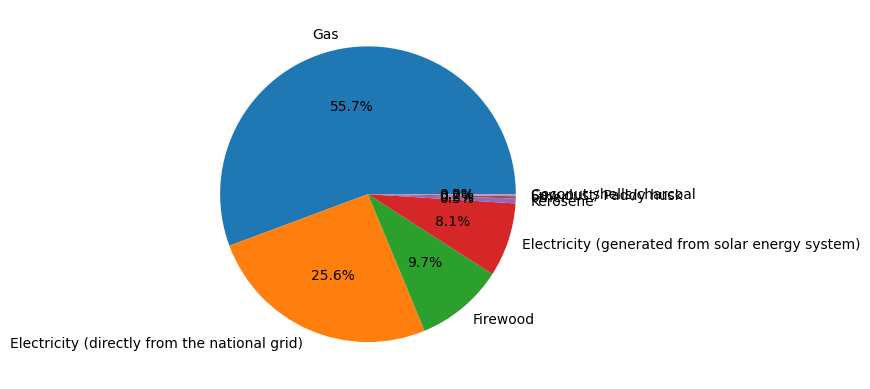

In [152]:
x = survey_data['W1_F_6'].value_counts()
labels = ['Gas', 'Electricity (directly from the national grid)', 'Firewood', 'Electricity (generated from solar energy system)' , 'Kerosene', 'other', 'Saw dust/ Paddy husk', 'Coconut shells/charcoal ']

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%')

#### What sources of energy does your house use for cooking? 
1. Gas
2. Electricity (directly from the national grid)
3. Electricity (generated from solar energy system),
4. Firewood,
5. Kerosene,
6. Saw dust/ Paddy husk,
7. Biogas,
8. Coconut shells/charcoal,
9. Other

([<matplotlib.patches.Wedge at 0x7f3dd820ac50>,
 [Text(-1.004465398008386, 0.44838517393403526, 'Gas'),
  Text(0.9360007809726487, -0.5778430046462375, 'Firewood'),
  Text(1.0791928965796327, -0.2129382351107057, 'Electricity (directly from the national grid)'),
  Text(1.0960202836961295, -0.09348549473932272, 'Other'),
  Text(1.0994595353942476, -0.03447796442172018, 'Kerosene'),
  Text(1.0999441571806752, -0.011083820825621227, 'Electricity (generated from solar energy system)'),
  Text(1.0999972423329525, -0.0024630996529087005, 'Saw dust/ Paddy husk')],
 [Text(-0.5478902170954831, 0.24457373123674647, '86.6%'),
  Text(0.5105458805305356, -0.31518709344340223, '9.1%'),
  Text(0.5886506708616178, -0.11614812824220308, '2.3%'),
  Text(0.5978292456524342, -0.05099208803963057, '1.2%'),
  Text(0.599705201124135, -0.018806162411847367, '0.5%'),
  Text(0.5999695402803682, -0.0060457204503388505, '0.2%'),
  Text(0.5999984958179739, -0.0013435089015865636, '0.1%')])

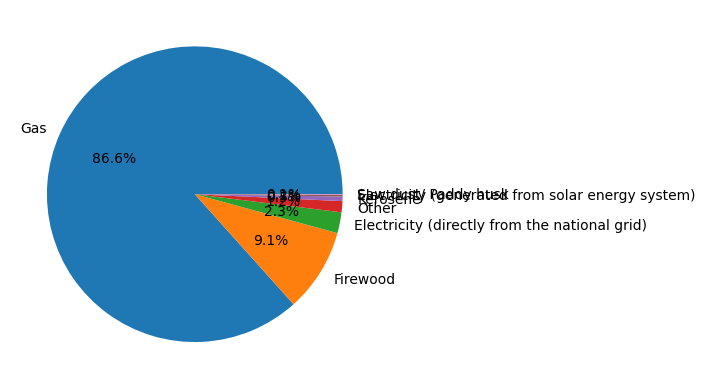

In [156]:
x = survey_data['W1_G_2_O1'].value_counts()
labels = ['Gas', 'Firewood', 'Electricity (directly from the national grid)', 'Other', 'Kerosene', 'Electricity (generated from solar energy system)', 'Saw dust/ Paddy husk']

fig, ax = plt.subplots()
ax.pie(x, labels=labels, autopct='%1.1f%%')

#### Household Expenses for last month

In [176]:
x = survey_data[survey_data['W1_H_4'] > 10000000]

x['W1_H_4']

32      999999999
156     999999999
201     999999999
253     999999999
269     999999999
          ...    
2559    999999999
2561    999999999
2605    999999999
2697    999999999
2749    999999999
Name: W1_H_4, Length: 84, dtype: int64

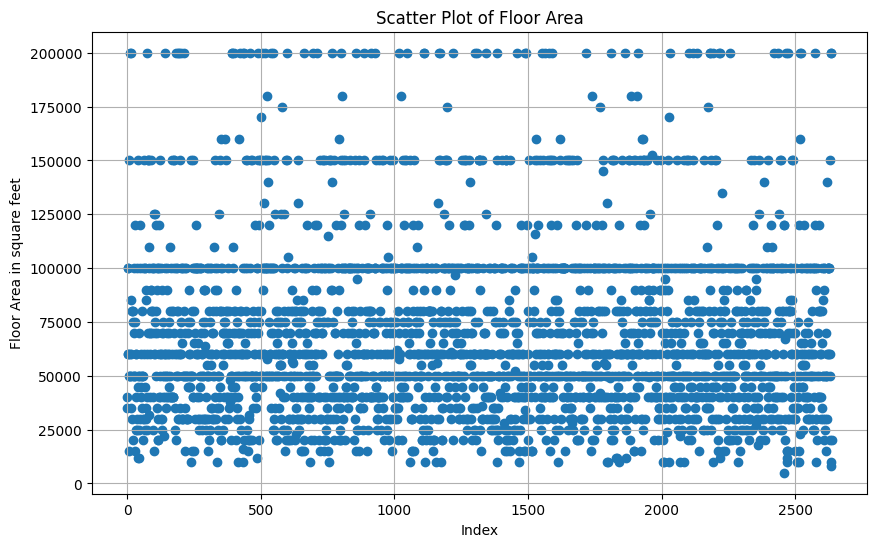

In [183]:
x = survey_data[survey_data['W1_H_4'] <= 200000]

x['W1_H_4']

plt.figure(figsize=(10, 6))
plt.scatter(range(len(x)), x['W1_H_4'])
plt.title('Scatter Plot of Floor Area')
plt.xlabel('Index')
plt.ylabel('Floor Area in square feet')
plt.grid(True)

plt.show()

### Merging survey data with smart meter data

300 households have data from both survey and LECO 

In [2]:
leco_all = pd.DataFrame()
root_folder = '/lirneasia/data/lacuna/processed/sm_april_2024_dump'
directory = os.path.join(root_folder)

if os.path.exists(directory):
    files = os.listdir(directory)

    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root_folder, file_name)
                
            leco_data = pd.read_csv(file_path, low_memory=False)

            leco_all = pd.concat([leco_all, leco_data], ignore_index=False)

else:
    print("path wrong") 

In [44]:
sm = leco_all.drop_duplicates(subset=['customerref'])
merged = pd.merge(sm, survey_data, left_on='customerref', right_on='ACCOUNT_NO', how='inner')
merged['T_PData_6'].value_counts()

T_PData_6
smart_meter        255
non_smart_meter     45
Name: count, dtype: int64

In [45]:
'''No of households have solar panels for generating electricity in the merged dataset with LECO data'''
solar_count = len(merged[merged['T_W1_E_11_1'] == 1])
solar_count

28

In [43]:
unique_customerrefs = merged['customerref'].unique()
merged_filtered = leco_all[leco_all['customerref'].isin(unique_customerrefs)]

exported = merged_filtered[merged_filtered['exportkwh(kwh)'] > 0]

len(exported['customerref'].unique())

55